In [1]:
%config Completer.use_jedi = False

# Bayesian A/B/C test.
### Calculating Each Advertisement's Probability
- Using <a href="https://en.wikipedia.org/wiki/Beta_distribution">$Beta \space Distribution$</a>.
- Without calculating Integral of joint distribution, approximate the Bayesian probability of each advertisement.
    - Monte Carlo Simulation.

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
import pandas as pd
from scipy.stats import beta, bernoulli
import numpy as np

In [3]:
def dummy_genrator(conversion_rate, n_impression):
    return np.array(bernoulli(conversion_rate).rvs(n_impression))

In [4]:
a = dummy_genrator(0.177470, 8500)
b = dummy_genrator(0.165777, 8500)
imp_a = len(a)
imp_b = len(b)
conv_a = 1500
conv_b = 1410
print("A \n Counts: {}\n Conversions: {}\n".format(imp_a, conv_a))
print("B \n Counts: {}\n Conversions: {}\n".format(imp_b, conv_b))

A 
 Counts: 8500
 Conversions: 1500

B 
 Counts: 8500
 Conversions: 1410



In [7]:
beta(1501,8501).rvs(1)

array([0.14279551])

In [9]:
a = (1,2)
a.count(1)

1

### Calculation by Formula
- Formulas By Evan Miller
- http://www.evanmiller.org/bayesian-ab-testing.html
>This page collects a few formulas I’ve derived for evaluating A/B tests in a Bayesian context. The formulas on this page are closed-form, so you don’t need to do complicated integral evaluations; they can be computed with simple loops and a decent math library. The advantage of Bayesian formulas over the traditional frequentist formulas is that you don’t have to collect a pre-ordained sample size in order to get a valid result. (See How Not To Run An A/B Test for more context on the “peeking” problem, and Simple Sequential A/B Testing for a frequentist solution to the problem.)

$${\rm Pr}(p_C > \max{\{p_A, p_B\}}) = \int_0^1 \int_0^{p_C} \int_0^{p_C} f(p_A) f(p_B) f(p_C) dp_A dp_B dp_C$$

In [12]:
n = 10000
total = 8000
cv_a = 1600
cv_b = 1500
cv_c = 1580

posterior_list_a = beta(cv_a+1, total-cv_a+1).rvs(n)
posterior_list_b = beta(cv_b+1, total-cv_b+1).rvs(n)
posterior_list_c = beta(cv_c+1, total-cv_c+1).rvs(n)

prob_a = ((posterior_list_a > posterior_list_c).sum())/(n)
prob_b = ((posterior_list_b > posterior_list_a).sum())/(n)
prob_c = ((posterior_list_c > posterior_list_a).sum())/(n)

### Does Integration take place into 3-Dimension?
- Can it be solved by Monte Carlo simulation?

In [13]:
n = 200000
total = 8000
cv_a = 1600
cv_b = 1500
cv_c = 1580

posterior_list_a = beta(cv_a+1, total-cv_a+1).rvs(n)
posterior_list_b = beta(cv_b+1, total-cv_b+1).rvs(n)
posterior_list_c = beta(cv_c+1, total-cv_c+1).rvs(n)

prob_a = ((posterior_list_a > posterior_list_c).sum())/(n)
prob_b = ((posterior_list_b > posterior_list_a).sum())/(n)
prob_c = ((posterior_list_c > posterior_list_a).sum())/(n)

print('a win:', prob_a)
print('b win:', prob_b)
print('c win:', prob_c)

prob_a + prob_b + prob_c - 1

a win: 0.65497
b win: 0.02298
c win: 0.34503


0.02298

### Comparing with Dynamic Yield's Bayesian Probability Calculator
<a href="https://marketing.dynamicyield.com/bayesian-calculator/">Dynamic Yield's BAYESIAN A/B TESTING CALCULATOR</a>

![Dynamic_Yield](dynamic_yield.png)

### Problem
- Total Probability of Advertisements Exceeds 1.0  
- <a href="https://en.wikipedia.org/wiki/Probability_axioms">$Probability\space Exioms$</a>
    - $P(\Omega) = 1$

### Experiment -01
- Calculating bayesian probability for 100 times

In [14]:
total_prob_error = []
for i in range(0,100):
    posterior_list_a = beta(cv_a+1, total-cv_a+1).rvs(n)
    posterior_list_b = beta(cv_b+1, total-cv_b+1).rvs(n)
    posterior_list_c = beta(cv_c+1, total-cv_c+1).rvs(n)

    prob_a = ((posterior_list_a > posterior_list_c).sum())/(n)
    prob_b = ((posterior_list_b > posterior_list_a).sum())/(n)
    prob_c = ((posterior_list_c > posterior_list_a).sum())/(n)
    
    total_prob_error.append(0)
    total_prob_error[i] = prob_a + prob_b + prob_c - 1
    
    print('Experiment Count :',i+1,  '   The Error of total Probability : ', prob_a + prob_b + prob_c - 1)
    if (i % 10 == 0) & (i != 0) :
        print('\n')
        
print('Mean Error of Probability :',np.mean(total_prob_error), \
      '   Variance of Errors : ', np.var(total_prob_error))

Experiment Count : 1    The Error of total Probability :  0.022710000000000008
Experiment Count : 2    The Error of total Probability :  0.02228500000000011
Experiment Count : 3    The Error of total Probability :  0.02312499999999984
Experiment Count : 4    The Error of total Probability :  0.022559999999999913
Experiment Count : 5    The Error of total Probability :  0.022599999999999953
Experiment Count : 6    The Error of total Probability :  0.022800000000000153
Experiment Count : 7    The Error of total Probability :  0.02289999999999992
Experiment Count : 8    The Error of total Probability :  0.02251000000000003
Experiment Count : 9    The Error of total Probability :  0.023070000000000146
Experiment Count : 10    The Error of total Probability :  0.023015000000000008
Experiment Count : 11    The Error of total Probability :  0.023085000000000022


Experiment Count : 12    The Error of total Probability :  0.022645000000000026
Experiment Count : 13    The Error of total Probabi

### 실험 결과 정리
- 오차는 __평균 0.0228__에 __분산은 0.000000135__
- 0.023정도의 __오차를 무시__해도 되는가?
> #### Thompson Sampling과 Bayesian Probability 계산의 접점?
    - Thompson Sampling은 쭉 진행하고, 기준 Traffic 시점에 Bayesian Probability 계산(Thompson Sampling하면서 갖고 있는 각 대안들의 Conversion과 Count 정보를 이용한다. 
        - A : Beta(cv_a + 1, cnt_a - cv_a + 1).rvs(cnt_a)
        - B : Beta(cv_b + 1, cnt_b - cv_b + 1).rvs(cnt_b)
        - C : Beta(cv_c + 1, cnt_c - cv_c + 1).rvs(cnt_c)

### Experiment -02
> 4 Ads, A/B/C/D

In [55]:
n = 20000 #num of random samples
total = 8000




cv_a = 1600
cv_b = 1500
cv_c = 1580
cv_d = 1480
cv_zero = 0



posterior_list_a = beta(cv_a+1, total-cv_a+1).rvs(n)
posterior_list_b = beta(cv_b+1, total-cv_b+1).rvs(n)
posterior_list_c = beta(cv_c+1, total-cv_c+1).rvs(n)
posterior_list_d = beta(cv_d+1, total-cv_d+1).rvs(n)
posterior_list_zero = beta(cv_zero+1, total-cv_zero+1).rvs(n)

prob_a = ((posterior_list_a > posterior_list_c).sum())/(n)
prob_b = ((posterior_list_b > posterior_list_a).sum())/(n)
prob_c = ((posterior_list_c > posterior_list_a).sum())/(n)
prob_d = ((posterior_list_d > posterior_list_a).sum())/(n)
prob_zero = ((posterior_list_zero > posterior_list_a).sum())/(n)


print('a win:', prob_a)
print('b win:', prob_b)
print('c win:', prob_c)
print('d win:', prob_d)
print('zero',prob_zero)
print(prob_a+prob_b+prob_c+prob_d)

a win: 0.6504
b win: 0.02315
c win: 0.3496
d win: 0.0075
zero 0.0
1.03065


### 실험 결과
- 오차 값이 증가했지만 결과 값은 Bayesian Calculator와 비슷하게 나오는 것을 확인

- [1] cv를 순서대로 정리하는 코드 필요 또는 가장 큰 cv나오는 대안을 선정하는 코드 필요
- [2] 정리 후 abcd 객체를 만들어서 전달하는 코드로 업데이트
- [3] 대안이 2개일 때 3개일 때 4개일 때 달라지면?
    - 4개까지 안에 대한 cv와 impression을 만들어두고 들어오는 값에 따라서 값을 업데이트 하는 방식으로

### [1], [2] 수정

In [130]:
cv_1 = 1500
cv_2 = 1480
cv_3 = 1580
cv_4 = 1600

ads_rvs = [cv_1, cv_2, cv_3, cv_4]
sorted_rvs = sorted(ads_rvs, reverse=True)
max_rvs = np.max(ads_rvs)
win_index_1st = ads_rvs.index(sorted_rvs[0]) #choose best ad

print(win_index)
#print('win index?',win_index+1)

# for i in range(len(ads_rvs)) : 
#     print('ads list', ads_rvs)
#     max_rvs = np.max(ads_rvs)
#     win_index = ads_rvs.index(sorted_rvs[0])
#     print('win index?',win_index+1)
#     sorted_rvs.pop(0)
#     print(ads_rvs)
    
posterior_list_best = beta(ads_rvs[win_index_1st]+1, total-ads_rvs[win_index_1st]+1).rvs(n) #best ad's posterior
ads_rvs.pop(win_index_1st)
first = sorted_rvs.pop(0)

win_index_2nd = ads_rvs.index(sorted_rvs[0])
print(ads_rvs)

posterior_list_2nd = beta(ads_rvs[win_index_2nd]+1, total-ads_rvs[win_index_2nd]+1).rvs(n) #second ad's posterior
ads_rvs.pop(win_index_2nd)
second = sorted_rvs.pop(0)

win_index_3rd = ads_rvs.index(sorted_rvs[0])
print(ads_rvs)

posterior_list_3rd = beta(ads_rvs[win_index_3rd]+1, total-ads_rvs[win_index_3rd]+1).rvs(n) #third ad's posterior
ads_rvs.pop(win_index_3rd)
third = sorted_rvs.pop(0)

win_index_4th = ads_rvs.index(sorted_rvs[0])
print(ads_rvs)

posterior_list_4th = beta(ads_rvs[win_index_4th]+1, total-ads_rvs[win_index_4th]+1).rvs(n) #4th ad's posterior


prob_a = ((posterior_list_best > posterior_list_2nd).sum())/(n)
prob_b = ((posterior_list_2nd > posterior_list_best).sum())/(n)
prob_c = ((posterior_list_3rd > posterior_list_best).sum())/(n)
prob_d = ((posterior_list_4th > posterior_list_best).sum())/(n)
    
ads_rvs = [cv_1, cv_2, cv_3, cv_4]
print(ads_rvs)
print('{} win:'.format(ads_rvs.index(first)), prob_a)
print('{} win:'.format(ads_rvs.index(second)), prob_b)
print('{} win:'.format(ads_rvs.index(third)), prob_c)
print('{} win:'.format(ads_rvs.index(sorted_rvs[0])), prob_d)


0
[1500, 1480, 1580]
[1500, 1480]
[1480]
[1500, 1480, 1580, 1600]
3 win: 0.65855
2 win: 0.34145
0 win: 0.024
1 win: 0.00835


In [26]:
class BayesianAB:
    
    def __init__(self, params=None, size=2):
        """
            params are a list of Beta distribution's initial params. e.g. [[alpha of A, beta of A], [alpha of B, beta of B]]
        """
        if params is None:
            self.params = []
            for _ in range(size):
                self.params.append([1,1])
        self.size = len(self.params)
        self.data = []
        for _ in range(size):
            self.data.append([0,0])
        print("the number of comparison: ", self.size)
        self.sampling()
        
    def update(self, data, sampling=True):
        """
         data are a list of pairs of impression and conversion. e.g. [[imp of A, conv of A], [imp of B, conv of B]]
        """
        if self.size != len(data):
            print("No match of the size.")
        
        for p, current, new in zip(self.params, self.data, data):
            imp = new[0]
            conv = new[1]
            current[0] += imp
            current[1] += conv
            p[0] += conv
            p[1] += (imp - conv)
        if sampling:
            self.sampling()
        
        
    def mean_ver(self):
        """
            return [(mean of A, variance of A), (mean of B, variance of B), ...]
        """
        return  [(posterior.mean(), posterior.var())for posterior in self.posterior_list]

        
        
    def sampling(self, n_samples=50000):
        print("num of samples: ", n_samples)
        self.posterior_list = [beta(*p).rvs(n_samples) for p in self.params]


        
    def show_beta(self, title="", save=False, labels=None):
        
        plt.figure(figsize=(10, 5))
        plt.title("Posterior distribution "+ title)
        
        cmap = plt.get_cmap('jet')
        color_list= []
            
        for i, posterior in enumerate(self.posterior_list):
            color =cmap(0.25*(i+1))
            color_list.append(color)
            plt.hist(posterior, bins=100, histtype="stepfilled", normed=True, color=color, alpha=0.5)
        handles = [Rectangle((0,0),1,1,color=c, ec="k", alpha=0.5) for c in color_list]
        
        if labels is None:
            labels = [chr(65+i) for i in range(self.size)] # create A,B,...
            

        plt.legend(handles, labels)
        if save:
            plt.savefig("{}.png".format(title))
        plt.show()
    
    def diff_prob(self, index_high, index_low):
        prob = (self.posterior_list[index_low] < self.posterior_list[index_high]).mean()
        if prob < 0.5:
            prob = 1 - prob
        return prob
    
    def show_metrics(self):
        print(self.data)
        
    def metrics(self, labels=None):
        if labels is None:
            labels = [chr(65+i) for i in range(self.size)] # create A,B,...
        return pd.DataFrame(self.data, index=labels, columns=["Impressions", "Conversions"])
        

In [27]:
abtest = BayesianAB()

the number of comparison:  2
num of samples:  50000


In [29]:
imp_a = total
imp_b = total
imp_c = total
imp_d = total

conv_a = cv_a
conv_b = cv_b
conv_c = cv_c
conv_d = cv_d
print("A \n Counts: {}\n Conversions: {}\n".format(imp_a, conv_a))
print("B \n Counts: {}\n Conversions: {}\n".format(imp_b, conv_b))
print("C \n Counts: {}\n Conversions: {}\n".format(imp_c, conv_c))
print("D \n Counts: {}\n Conversions: {}\n".format(imp_d, conv_d))

A 
 Counts: 8000
 Conversions: 1600

B 
 Counts: 8000
 Conversions: 1500

C 
 Counts: 8000
 Conversions: 1580

D 
 Counts: 8000
 Conversions: 1480



the number of comparison:  4
num of samples:  50000
num of samples:  50000


//anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


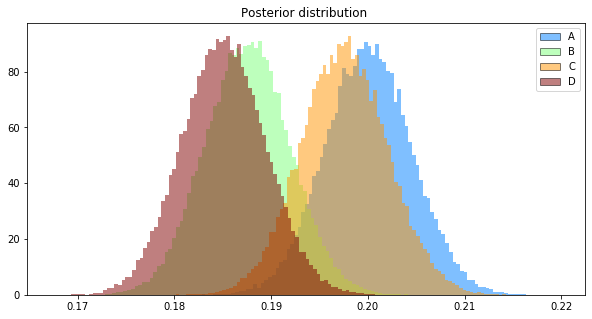

In [33]:
abtest = BayesianAB(size=4)
abtest.update([[imp_a, conv_a], [imp_b, conv_b],[imp_c, conv_c],[imp_d, conv_d]])
abtest.show_beta()
#abtest.diff_prob()

In [35]:
prob_c = ((posterior_list_c > posterior_list_a).sum())/(n)
prob_d = ((posterior_list_d > posterior_list_a).sum())/(n)
print(prob_c, prob_d)

0.34645 0.00785
